Rutas más cortas desde Almacén A (nodo 0):
Almacén A: 0 minutos
Almacén A → Almacén B: 5 minutos
Almacén A → Almacén B → Almacén C: 7 minutos
Almacén A → Almacén B → Almacén C → Almacén D: 12 minutos
Almacén A → Almacén B → Almacén C → Almacén D → Cliente 1: 22 minutos
Almacén A → Almacén B → Almacén C → Almacén D → Cliente 2: 15 minutos
Almacén A → Almacén B → Almacén C → Almacén D → Cliente 2 → Cliente 3: 17 minutos


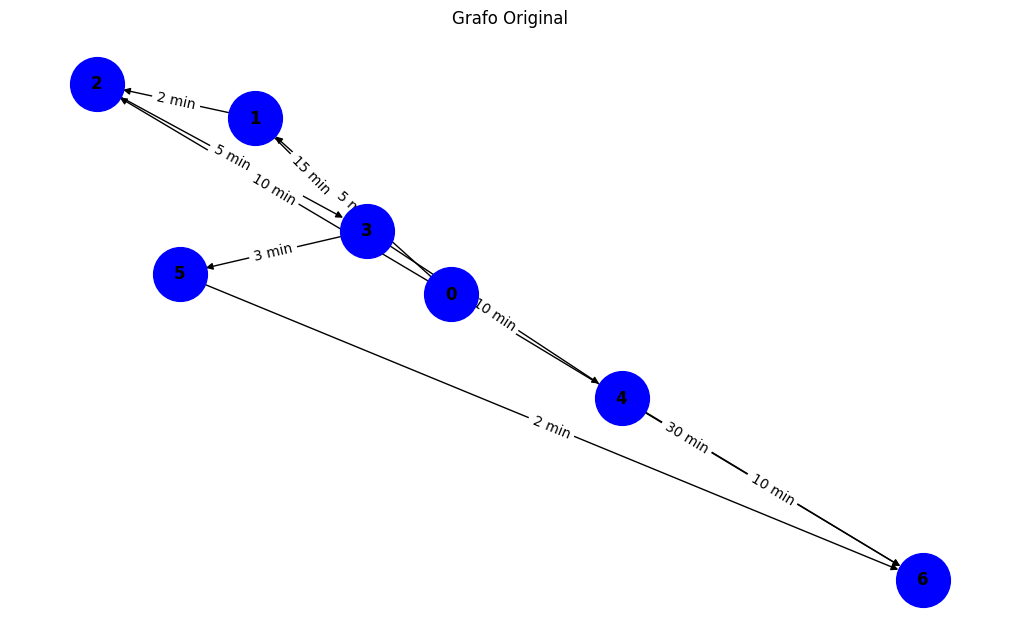

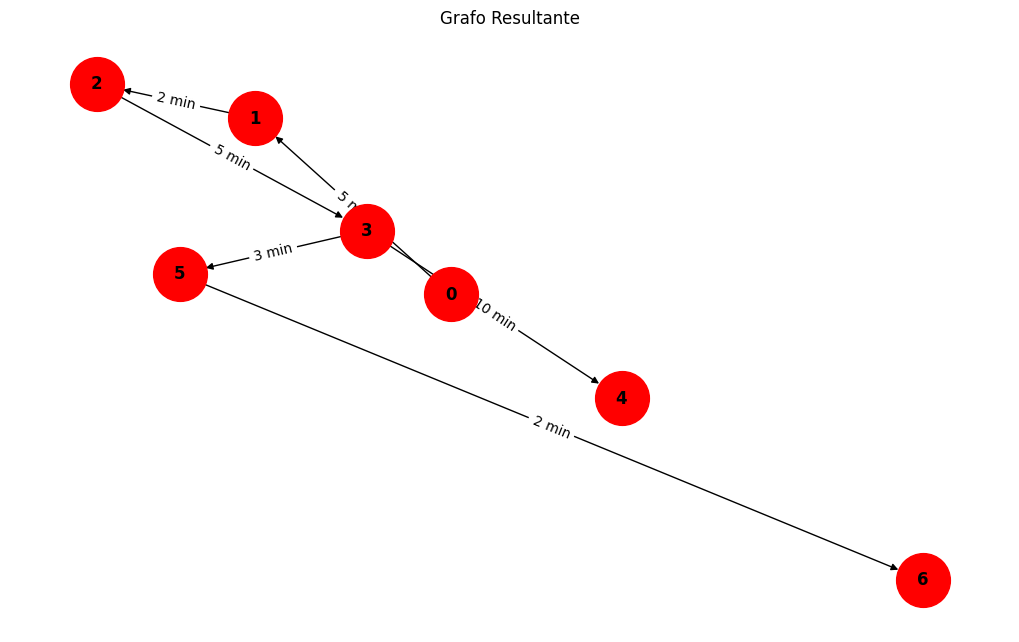

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

#Usé e algoritmo de Dijkstra, ya que el problema pide encontrar las rutas más
#cortas en un grafo ponderado con pesos positivos (tiempos de entrega en min).

G = nx.DiGraph()

nombres_nodos = {
    0: "Almacén A",
    1: "Almacén B",
    2: "Almacén C",
    3: "Almacén D",
    4: "Cliente 1",
    5: "Cliente 2",
    6: "Cliente 3"
}

aristas = [
    (0, 1, 5),
    (0, 2, 10),
    (1, 2, 2),
    (1, 3, 15),
    (2, 3, 5),
    (3, 4, 10),
    (3, 5, 3),
    (4, 6, 10),
    (5, 6, 2),
    (0, 6, 30)
]

for u, v, w in aristas:
    G.add_edge(u, v, weight=w)

distancias, caminos = nx.single_source_dijkstra(G, source=0)

print("Rutas más cortas desde Almacén A (nodo 0):")
for destino in sorted(distancias):
    ruta = " → ".join(nombres_nodos[n] for n in caminos[destino])
    print(f"{ruta}: {distancias[destino]} minutos")

pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_color='blue', node_size=1500, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{d} min" for u, v, d in aristas})
plt.title("Grafo Original")
plt.show()

shortest_path_edges = []
for destino in caminos:
    path = caminos[destino]
    shortest_path_edges += [(path[i], path[i+1]) for i in range(len(path)-1)]

subG = nx.DiGraph()
for u, v in shortest_path_edges:
    peso = G[u][v]['weight']
    subG.add_edge(u, v, weight=peso)

plt.figure(figsize=(10, 6))
nx.draw(subG, pos, with_labels=True, node_color='red', node_size=1500, font_weight='bold')
nx.draw_networkx_edge_labels(subG, pos, edge_labels={(u, v): f"{G[u][v]['weight']} min" for u, v in subG.edges()})
plt.title("Grafo Resultante")
plt.show()
